# 01 distplot 直方图



In [1]:
import pandas as pd # Pandas
import numpy as np # Numpy
import matplotlib.pyplot as plt # Matplotlibrary
import seaborn as sns # Seaborn Library
%matplotlib inline
sns.set()

In [4]:
# Load the Dataset in Python
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


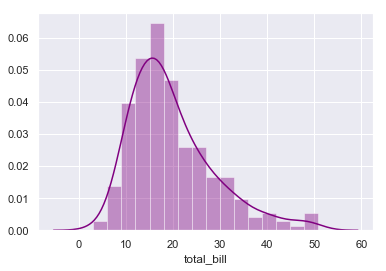

In [5]:
sns.distplot(tips["total_bill"], bins=16, color="purple")
# Binsize is calculated using square-root of row count.

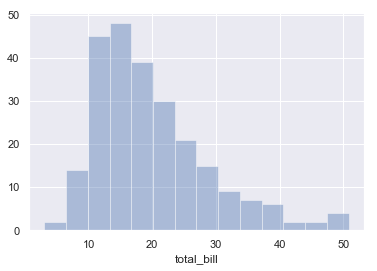

In [7]:
#去掉拟合的密度估计曲线，kde参数设为False
sns.distplot(tips["total_bill"],kde=False)

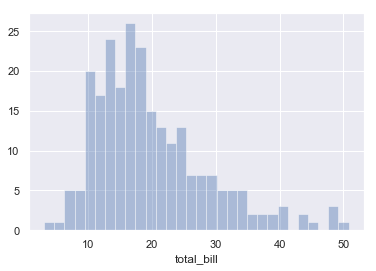

In [8]:
# 通过'bins'参数设定数据片段的数量
sns.distplot(tips["total_bill"],bins=30,kde=False)

**'reg' 参数用于控制直方图中的边际毛毯，通过控制'reg'是实现毛毯是否显示。**

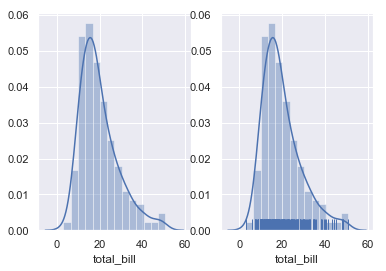

In [9]:
#创建一个一行2列的画布,主要方便对比
fig,axes=plt.subplots(1,2)

#设置'reg'参数，加上观测数值的边际毛毯
#需要用axes[]表示是第几张图，从0开始
sns.distplot(tips["total_bill"],ax=axes[0]) #左图
sns.distplot(tips["total_bill"],rug=True,ax=axes[1]) #右图

**除了控制矩形分布、密度曲线及边际毛毯是否显示，还可以通过更丰富的参数控制他们展示的细节，这些通过参数 'hist_kws' 、'kde_kws' 、'reg_kws' 来进行设置，因为其中涉及到多个参数，参数间用逗号隔开，参数外面用大括号括住。**

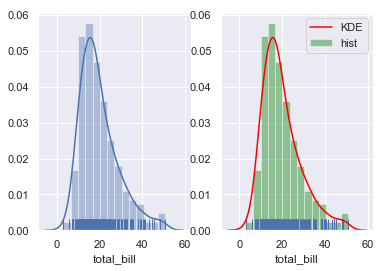

In [13]:
#可以分别控制直方图、密度图的关键参数
fig,axes=plt.subplots(1,2) 
sns.distplot(tips["total_bill"],rug=True,ax=axes[0])
sns.distplot(tips["total_bill"],rug=True,
                     hist_kws={'color':'green','label':'hist'},
                     kde_kws={'color':'red','label':'KDE'},
                     ax=axes[1])

# 02 barplot 条形图
barplot() 利用矩阵条的高度反映数值变量的集中趋势，barplot() 默认展示的是某种变量分布的平均值（可通过参数修改为 max、median 等）。

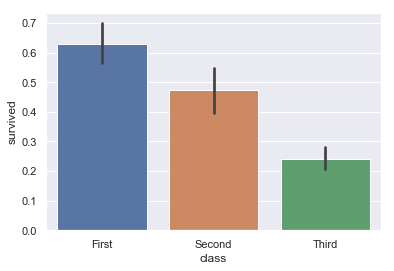

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#导入数据集'titanic'，命名为'titanic'
titanic=sns.load_dataset('titanic')

#将'class'设为x轴，'survived'为y轴，传入'titanic'数据
sns.barplot(x='class',y='survived',data=titanic)

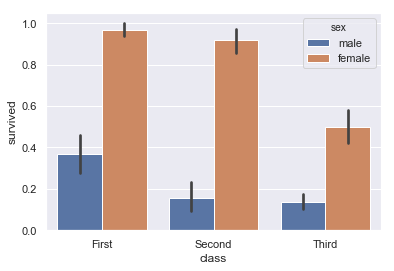

In [18]:
#通过设置'hue'参数，对x轴的数据进行细分，细分的条件就是'hue'的参数值，x轴是'class'（仓位等级），我们将其按'sex'（性别）再进行细分。
sns.barplot(x='class',y='survived',hue='sex',data=titanic)

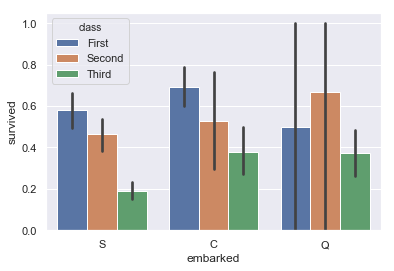

In [17]:
#将x轴设为'embarked'，y轴设为'survived'，并用'class'进行细分。
sns.barplot(x='embarked',y='survived',
                    hue='class',data=titanic)

# 03 countplot 计数图
countplot 故名思意，计数图，可将它认为一种应用到分类变量的直方图，也可认为它是用以比较类别间计数差。当你想要显示每个类别中的具体观察数量时，countplot 很容易实现，比较类似我们在 Excel 等软件中应用的条形图。

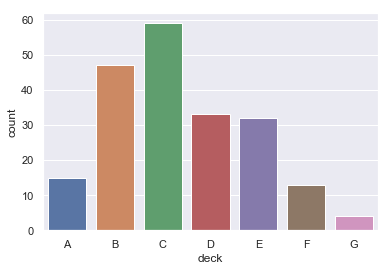

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')
#选定某个字段，countplot() 会自动帮我们统计该字段下各类别的数目。
sns.countplot(x='deck',data=titanic)

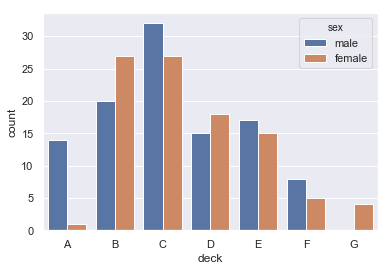

In [21]:
#再传入'hue'参数，进行细分，这里我们加入'sex'分类。
sns.countplot(x='deck',hue='sex',data=titanic)

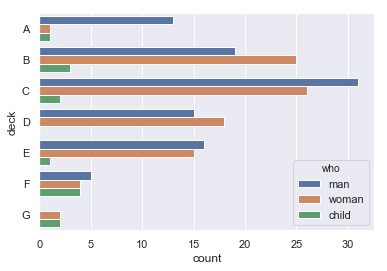

In [22]:
#望调换横纵坐标，也就是类别放于纵坐标，计数值横坐标显示，将x轴换为y轴即可
sns.countplot(y='deck',hue='who',data=titanic)

# 04 stripplot/swarmplot 散点图
在seaborn中有两种不同的分类散点图。stripplot() 使用的方法是用少量的随机“抖动”调整分类轴上的点的位置，swarmplot() 表示的是带分布属性的散点图。

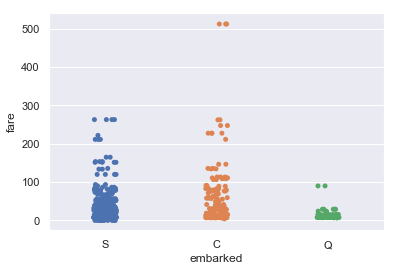

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')

sns.stripplot(x='embarked',y='fare',data=titanic)


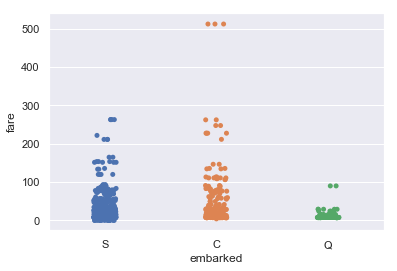

In [25]:
# jitter:当数据点重合较多时，可用该参数做一些调整  'jitter'参数控制抖动的大小
sns.stripplot(x='embarked',y='fare',
                    data=titanic,jitter=1)

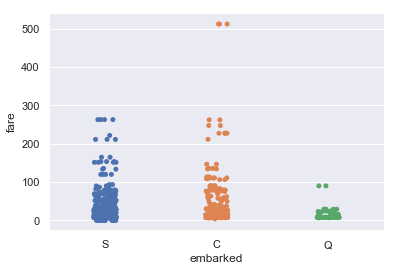

In [28]:
#dodge:控制组内分类是否彻底分拆
sns.stripplot(x='embarked',y='fare',
                    data=titanic,jitter=1,dodge=True)

swarmplot() 方法使用防止它们重叠的算法沿着分类轴调整点。它可以更好地表示观测的分布，它适用于相对较小的数据集。

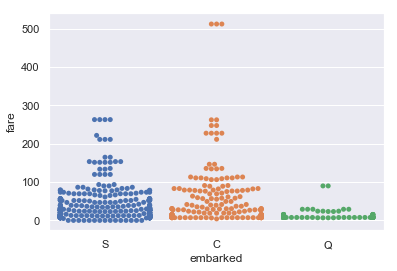

In [29]:
sns.swarmplot(x='embarked',y='fare',data=titanic)

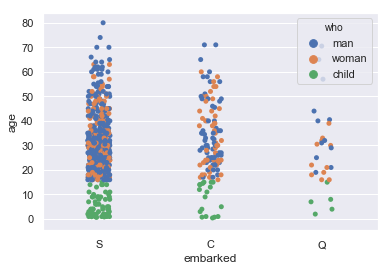

In [31]:
#可以通过'hue'参数，对散点图添加更多细分的维度，Seaborn 中会以颜色来进行区分。
sns.stripplot(x='embarked',y='age',hue='who',jitter=1,data=titanic)

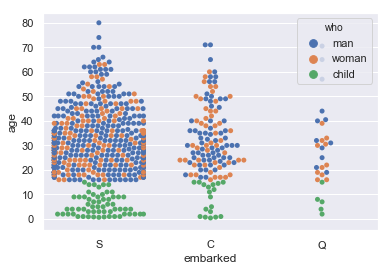

In [32]:
sns.swarmplot(x='embarked',y='age',hue='who',data=titanic)

# 05 boxplot 箱线图


箱形图 （Boxplot）是给定数据集的五点汇总统计的直观表示。 五个数字摘要包括：

* Minimum 最小值
* First Quartile 1/4 值
* Median (Second Quartile) 中位数
* Third Quartile 3/4 值
* Maximum 最大值

此外，值得注意的一点是，为分类 - 连续变量创建了一个箱线图，这意味着如果x轴是分类的并且y轴是连续的，则应创建箱线图或小提琴图。

让我们从 tips数据集创建一个 “day” 和 “total_bill” 的箱线图。

$$sns.boxplot(x = , y =, data=)$$

<img src="box.jpg" width=540>

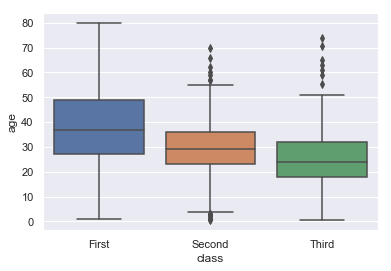

In [34]:
#以'titanic'数据集为例，我们首先来探索不同的'class'（船舱）下的乘客的'age'（年龄）情况。
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')

sns.boxplot(x='class',y='age',data=titanic)

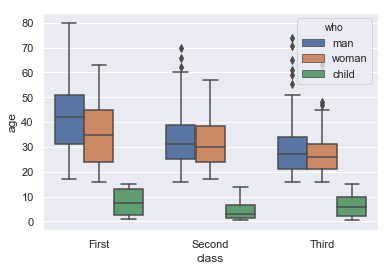

In [35]:
#传入'hue'的参数，来对x轴的字段进行细分，这里我们通过'who'来进行分类观察。
sns.boxplot(x='class',y='age',hue='who',data=titanic)

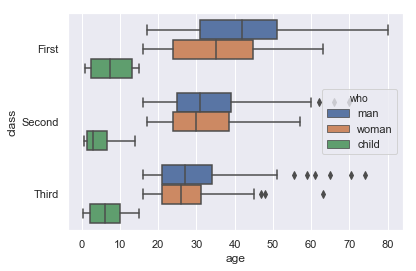

In [47]:
#通过调换x/y轴，实现箱线图的横向显示
sns.boxplot(x='age',y='class',hue='who',data=titanic)

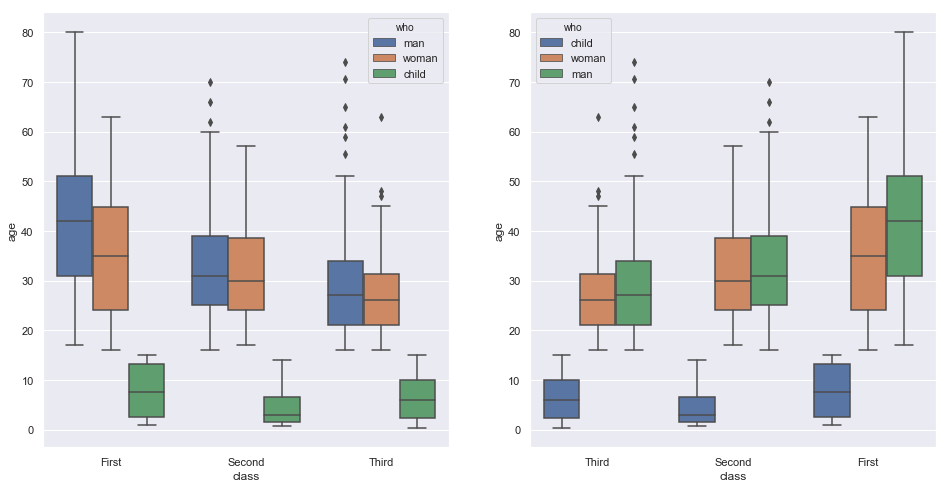

In [54]:
#调节'order' 和 'hue_order' 参数，我们可以控制x轴展示的顺序。


fig,axes=plt.subplots(1,2, figsize=(16, 8)) 

sns.boxplot(x='class',y='age',hue='who',
                    data=titanic,ax=axes[0])

sns.boxplot(x='class',y='age',hue='who',data=titanic,
                    order=['Third','Second','First'],
                    hue_order=['child','woman','man'],ax=axes[1])

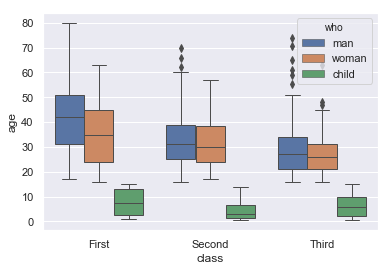

In [57]:
#'linewidth'参数，控制线条的粗细。我们把'linewidth'参数设为1，就可以看到整体图形的线条变细，
sns.boxplot(x='class',y='age',hue='who',
                    linewidth=1,data=titanic)

# 06 violinplot 小提琴图
小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高。

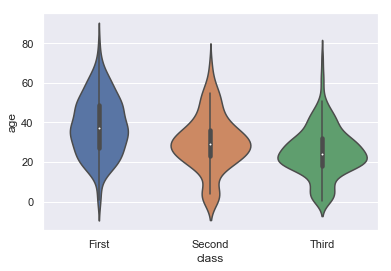

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
titanic=sns.load_dataset('titanic')

sns.violinplot(x='class',y='age',data=titanic)

在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计。

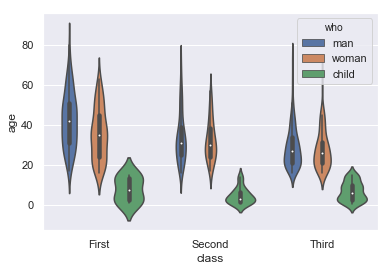

In [60]:
#设置'hue'参数，对字段进行细分。
sns.violinplot(x='class',y='age',hue='who',data=titanic)

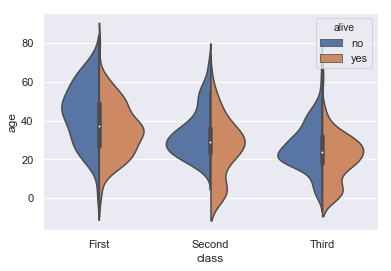

In [61]:
#当hue参数只有两个级别时，也可以通过设置'split'参数为True，“拆分”小提琴，提琴两边分别表示两个分类的情况，这样可以更有效地利用空间。
sns.violinplot(x='class',y='age',hue='alive',
                    data=titanic,split=True)

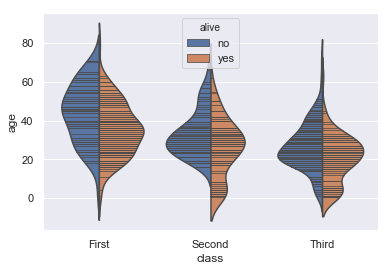

In [62]:
#小提琴内部添加图形来帮助我们进行分析，这里就需要控制'inner'参数。
sns.violinplot(x='class',y='age',hue='alive',
                    data=titanic,split=True,inner='stick')

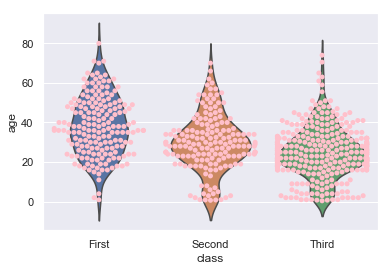

In [66]:
#散点图加入小提琴图中。
sns.violinplot(x='class',y='age',data=titanic,inner=None)
sns.swarmplot(x='class',y='age',data=titanic,color='pink')

# 07 regplot/lmplot 回归图

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#导入数据集'iris'
iris=sns.load_dataset('iris')

#随机查看数据集的10行数据
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
61,5.9,3.0,4.2,1.5,versicolor
39,5.1,3.4,1.5,0.2,setosa
90,5.5,2.6,4.4,1.2,versicolor
119,6.0,2.2,5.0,1.5,virginica
94,5.6,2.7,4.2,1.3,versicolor
146,6.3,2.5,5.0,1.9,virginica
70,5.9,3.2,4.8,1.8,versicolor
31,5.4,3.4,1.5,0.4,setosa
107,7.3,2.9,6.3,1.8,virginica
42,4.4,3.2,1.3,0.2,setosa


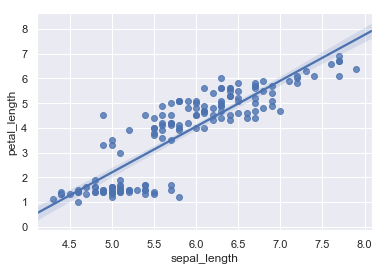

In [68]:
sns.regplot(x='sepal_length',y='petal_length',data=iris)

图中的点表示实际的数据点，Seaborn 根据这些数据拟合出直线，表示x轴和y轴对应字段之间的线性关系，直线周围的阴影表示置信区间。

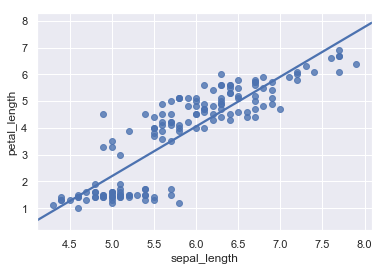

In [69]:
#关于置信区间，可以通过设置'ci'参数控制是否显示。
sns.regplot(x='sepal_length',y='petal_length',data=iris,ci=None)

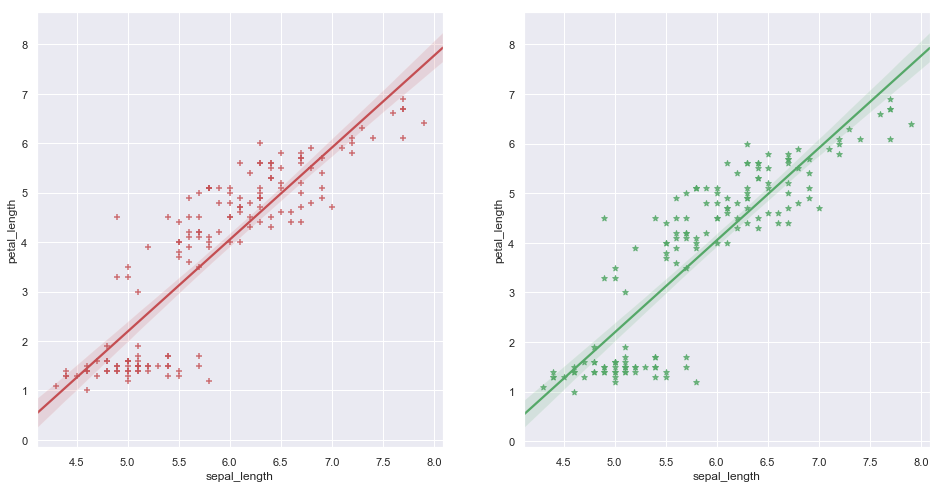

In [70]:
#可以通过'color'和'marker'参数来控制图形的颜色以及数据点的形状。
fig,axes=plt.subplots(1,2,figsize=(16,8)) 

sns.regplot(x='sepal_length',y='petal_length',data=iris,
            color='r',marker='+',ax=axes[0])

sns.regplot(x='sepal_length',y='petal_length',data=iris,
            color='g',marker='*',ax=axes[1])

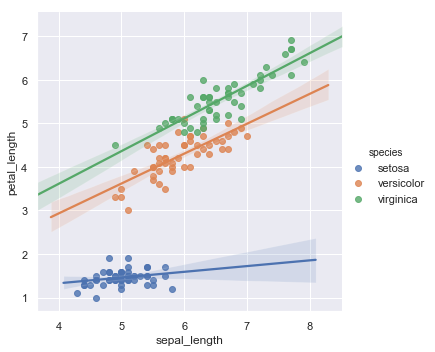

In [72]:
#lmplot() 可以设置hue，进行多个类别的显示，而 regplot() 是不支持的。这里我们通过设置hue='species'，来进行分类别地展示。
sns.lmplot(x='sepal_length',y='petal_length',
                 hue='species',data=iris)

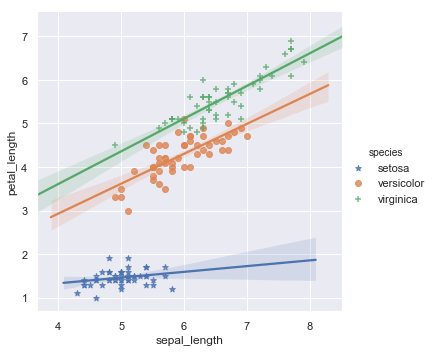

In [73]:
#更改数据点的形状，来进行区分。markers=['*','o','+']
sns.lmplot(x='sepal_length',y='petal_length',hue='species',
                    data=iris,markers=['*','o','+'])

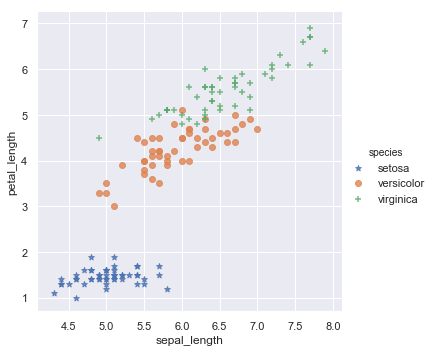

In [74]:
# 设置'fit_reg'参数，可以控制是否显示拟合的直线。
sns.lmplot(x='sepal_length',y='petal_length',hue='species',
                data=iris,markers=['*','o','+'],fit_reg=False)

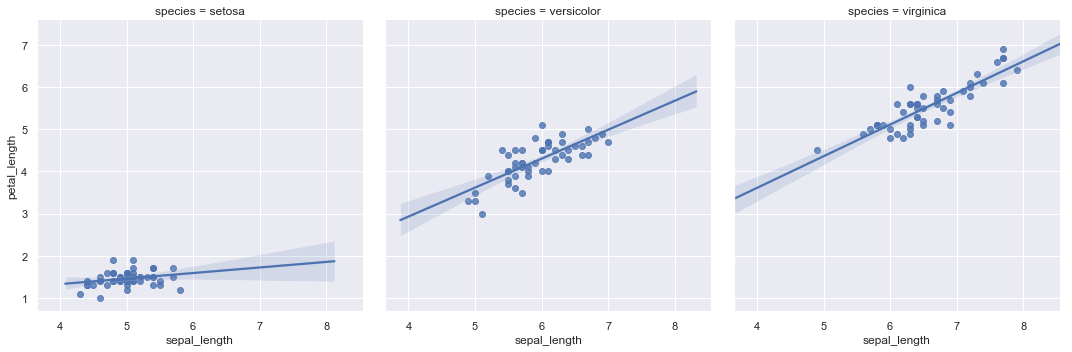

In [75]:
# 对不同的类别分开绘制，用'col'参数代替'hue'。
sns.lmplot(x='sepal_length',y='petal_length',
                col='species',data=iris)

# 08 heatmap 热力图
热力图通常用来表示特征之间的相关性，一般通过颜色的深浅来表示数值的大小或者相关性的高低。

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
flights = sns.load_dataset("flights")
flights.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


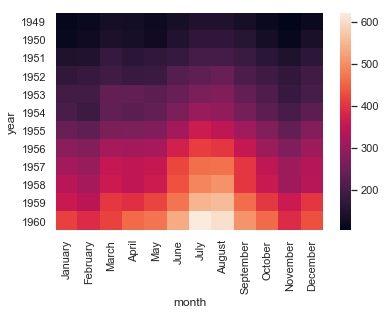

In [78]:
f=flights.pivot('year','month','passengers')
sns.heatmap(f)

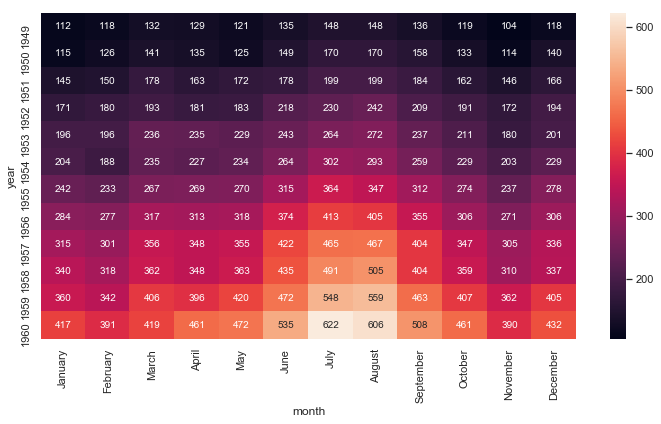

In [82]:
#要显示具体的数值，可以通过'annot'参数来控制。
plt.figure(figsize=(12, 6))
sns.heatmap(f, annot=True,fmt="d")

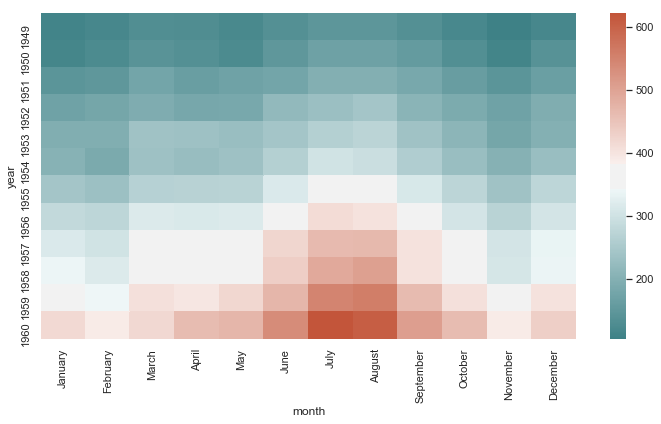

In [83]:
# Seaborn 的调色板控制热力图显示的颜色，
cmap = sns.diverging_palette(200,20,sep=20,as_cmap=True)
plt.figure(figsize=(12, 6))
sns.heatmap(f,cmap=cmap)

In [84]:
#将画布保存为'xiang.png'，还可以保存为jpg、svg格式图片
# plt.savefig('xiang.png')